In [1]:
# BIOL51000 - Data Systems Life Sciences
# Week 6: Image Processing and GUIs
# Mathew Golf

In [2]:
# Requires Lena.png, LenaBlue.png, LenaRed.png, LenaGreen.png, and Cells.jpg to work.

In [1]:
cd C:/Users/Mathe/Desktop/PythonForBiology

C:\Users\Mathe\Desktop\PythonForBiology


In [1]:
# Import system parameters and operating system 
import sys, os, numpy

# Import the necessary libraries/files for use in the notebook
# Commenting for these imports is located in the import file attached
from PIL import Image, ImageEnhance
from numpy import array, dstack, uint8, exp, mgrid, sqrt
from scipy import ndimage
import matplotlib.pyplot as plt

#Lena image Coding

In [2]:
# Code for importing an image
# Import the image file for use in the notebook; this also makes the loaded data into an image object
img = Image.open('Lena.png')

(512, 512)
RGBA


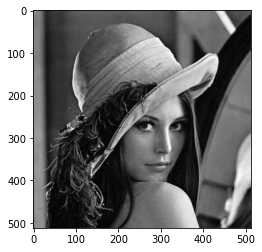

In [3]:
# Verify image properties
print(img.size)
print(img.mode)

# View the image in image viewer on computer uses below line of code
#img.show()

# generates image inline below using matplotlib
plt.imshow(img)
plt.show()

In [4]:
# Rotate the image
img2 = img.rotate(90)
img2.save('LenaRotated.png', 'PNG')

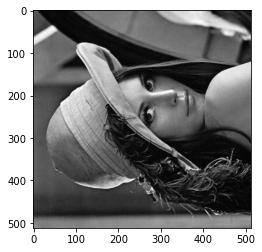

In [5]:
# Verify the image has been rotated
#img2.show()

plt.imshow(img2)
plt.show()

In [6]:
# Define the image variables
w, h = img2.size

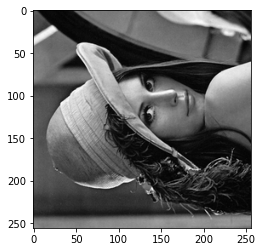

(256, 256)
RGBA


In [7]:
# Resize the image to half size

# Save the rotated and half sized image
# verify the image properties
imgHalf = img2.resize((w//2, h//2), Image.ANTIALIAS)    
imgHalf.save('LenaRotatedandHalf.png', 'PNG')
#imgHalf.show()
plt.imshow(imgHalf)
plt.show()# Notice that although the image is the same size visually on screen, the axes are halved
print(imgHalf.size)
print(imgHalf.mode)

In [8]:
# function which converts a pixmap to an image
# function converts the data into uint8, and also checks that pixels do not exceed 255, 
# scales them back
def pixmapToImage(pixmap, mode='RGB'):
  
  if pixmap.max() > 255:
    pixmap *= 255.0 / pixmap.max()

  pixmap = array(pixmap, uint8)
  imgConvert = Image.fromarray(pixmap, mode)
  
  return imgConvert

In [9]:
# function which converts an image to a pixmap
def imageToPixmapRGB(img):
  
  img3 = img.convert('RGB')
  w, h = img3.size  # width and height variables
  data = img3.getdata()

  pixmap = array(data, uint8)
  pixmapConvert = pixmap.reshape((h,w,3))
  
  return pixmapConvert

In [10]:
# image size
size = (h, w)

In [11]:
# importing three separate matrices (Lenas) for constructing a color image of the RGB type
# Load the three images/data for the RGB matrices
redMatrix = imageToPixmapRGB(Image.open('LenaRed.png'))
greenMatrix = imageToPixmapRGB(Image.open('LenaGreen.png'))
blueMatrix = imageToPixmapRGB(Image.open('LenaBlue.png'))

In [12]:
# Create a new matrix which combines the RGB matrices 
combinedMatrix = redMatrix
combinedMatrix[:,:,1]=greenMatrix[:,:,1]
combinedMatrix[:,:,2]=blueMatrix[:,:,2]

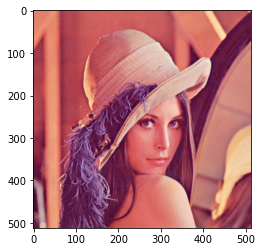

In [13]:
# Use the new matrix to construct a color image of Lena data, RGB
imgColor = pixmapToImage(combinedMatrix)
#imgColor.show()
plt.imshow(imgColor)
plt.show()

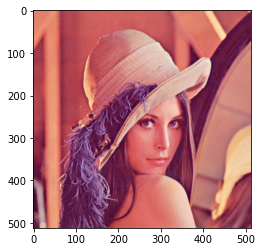

In [16]:
# ALTERNATE CODE FOR COMBINING THE THREE LENA IMAGES INTO A SINGLE COLOR IMAGE
redImage = imageToPixmapRGB(Image.open('LenaRed.png'))
greenImage = imageToPixmapRGB(Image.open('LenaGreen.png'))
blueImage = imageToPixmapRGB(Image.open('LenaBlue.png'))

# Add all pixmap matrices up into one matrix
pixmapAll = redImage + blueImage + greenImage

# Convert pixmap matrix to image called coloredLena
colorLena = pixmapToImage(pixmapAll)

# Show coloredLena image
plt.imshow(colorLena)
plt.show()

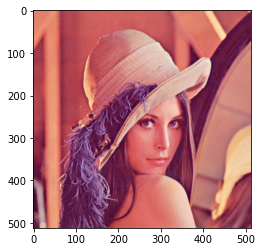

In [33]:
# ANOTHER ALTERNATE COLOR IMAGE ASSEMBLY USING DSTACK (MODIFIED FROM THE TEXT BOOK)
# import files into PIL Images
lenaRed = Image.open('LenaRed.png')
lenaGreen = Image.open('LenaGreen.png')
lenaBlue = Image.open('LenaBlue.png')

# slice out the layered matrix corresponding to respective channelS
lenaRedPixmap = imageToPixmapRGB(lenaRed)[:,:,0]
lenaGreenPixmap = imageToPixmapRGB(lenaGreen)[:,:,1]
lenaBluePixmap = imageToPixmapRGB(lenaBlue)[:,:,2]

# combine layers to create 1 numpy array that containing all channel information
pixmap = dstack([lenaRedPixmap, lenaGreenPixmap, lenaBluePixmap])

# pass the numpy array with all RGB layers to the function which will
# turn it into an Image, and then display that Image
lenaCombinedRGB = pixmapToImage(pixmap)
plt.imshow(lenaCombinedRGB)
plt.show()

#Cells image Coding

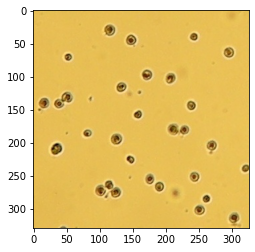

In [18]:
# Open the image file and verify that the correct image has opened
# makes the loaded data into an image object
imgC1 = Image.open('examples/Cells.jpg')
plt.imshow(imgC1)
plt.show()

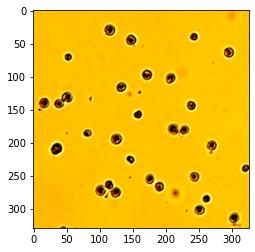

In [19]:
# "contrast change" on the color image (with an argument of 2.0)
processObj = ImageEnhance.Contrast(imgC1)
imgC2 = processObj.enhance(2.0)
plt.imshow(imgC2)
plt.show()

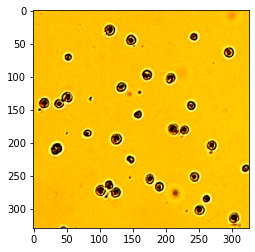

In [22]:
# Use ImageEnhance to sharpen the image which was contrast-changed
processObj = ImageEnhance.Sharpness(imgC2)
img2Sharp = processObj.enhance(4.0)  # Change the local contrast at the edges within the image to 4.0
plt.imshow(img2Sharp)
plt.show()

In [24]:
# Define a brightness-related function that will normalize the image to the full 0-255 range
# The smallest value in the pixmap is subtracted from all elements to set the minimum to 0
# The max is set to 255, by dividing by the adjusted pixmap max then multiplying by 255.0
def normalisePixmap(pixmap):
  
  pixmap -= pixmap.min()
  maxVal = pixmap.max()
  
  
  if maxVal > 0:
    pixmap *= 255.0 / maxVal

# pixmap is returned
  return pixmap

In [25]:
# Define a filtering function
# The convolution function requires that the two arrays used must have the same number of axes, 
# which is checked with if matrix.ndim below
def convolveMatrix2D(pixmap, matrix, mode='reflect'):
  
  matrix = array(matrix)

# Checking if 2D
  if matrix.ndim != 2:
    raise Exception('Convolution matrix must be 2D')

  if pixmap.ndim not in (2,3):
    raise Exception('Pixmap must be 2D or 3D')

# If the pixmap is 2D convolution is performed directly
  if pixmap.ndim == 2:
    pixmap2 = ndimage.convolve(pixmap, matrix, mode=mode)

# If the pixmap is 3D, color components are convolved separately and transformed colors are stacked
  else:
    layers = []
    
    for i in range(3):
      layer = ndimage.convolve(pixmap[:,:,i], matrix, mode=mode)
      layers.append(layer)
      
    pixmap2 = dstack(layers)
    
# pixmap2 is returned  
  return pixmap2

In [26]:
# Define a function that sharpens the image
def sharpenPixmap(pixmap):

# The function uses a filter matrix to accentuate differences between pixels
  matrix = [[-1,-1,-1],
            [-1, 8,-1],
            [-1,-1,-1]]

# The input pixmap is converted to a grey pixmap which is then convolved with the convolveMatrix2D filter 
# above to increase edge contrast
  grey = pixmap.mean(axis=2)
  
  pixmapEdge = convolveMatrix2D(grey, matrix)
  normalisePixmap(pixmapEdge)

# The grey pixmap is then centered on the average brightness
# dstack is used to ensure RGB layers are all adjusted
  pixmapEdge -= pixmapEdge.mean()
  pixmapEdge = dstack([pixmapEdge, pixmapEdge, pixmapEdge])

# A new and sharpened pixmap image is created using edge adjustment
# clipping is done to ensure the pixmap does not exceed the 0-255 limits
  pixmapSharp = pixmap + pixmapEdge 
  pixmapSharp = pixmapSharp.clip(0, 255)
  
# pixmapSharp is returned
  return pixmapSharp

In [27]:
# Define a function to apply Gaussian filter to blur the pixels with bell-curve weighting
# r is the half-width of the filter excluding the center 
# sigma is the amount of spread in the distribution
def gaussFilter(pixmap, r=2, sigma=1.4):

# mgrid is used to initialize grid values for the filter
  x, y = mgrid[-r:r+1, -r:r+1]

# row and column values are squared and scaled by two times sigma and the negative exponent of the sum 
# is taken to apply the filter    
  s2 = 2.0 * sigma * sigma
  
  x2 = x * x / s2
  y2 = y * y / s2
  
  matrix = exp( -(x2 + y2))
  matrix /= matrix.sum()
  
  pixmap2 = convolveMatrix2D(pixmap,  matrix)
    
# pixmap2 is returned
  return pixmap2

In [28]:
# Define the function that detects edges
# The function works by detecting intensity gradients between nearby pixels
def sobelFilter(pixmap):

# The filter uses a 3x3 matrix of negatives, zeros, and positive values
# Transformed pixels have a value representing the difference in values its sides
  matrix = array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

# Edge maps for X and Y are generated    
  grey = pixmap.mean(axis=2)
  edgeX = convolveMatrix2D(grey, matrix)
  edgeY = convolveMatrix2D(grey, matrix.T)

# The square root of the sum of squares provides a positive value and the image is normalized
  pixmap2 = sqrt(edgeX * edgeX + edgeY * edgeY)
  normalisePixmap(pixmap2) # Put min, max at 0, 255

# pixmap2 is returned
  return pixmap2 

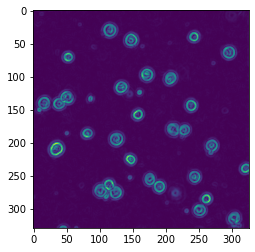

In [30]:
# Perform edge-detection using the above defined functions
# Open the cells image and make it an image object
imgCells = Image.open('examples/Cells.jpg')  

# convert the image to pixmap
pixmapC1 = imageToPixmapRGB(imgCells)  

# Sharpen the image
pixmapC2 = sharpenPixmap(pixmapC1)  

# Filter the image using gaussian filtering
pixmapC3 = gaussFilter(pixmapC2)  

# Filter the image using sobel filtering
pixmapGrey = sobelFilter(pixmapC3)  

# Display the resulting image
plt.imshow(pixmapGrey)
plt.show()